In [1]:
include("../Source/types.jl")
include("../Source/functions.jl")

testSystem (generic function with 2 methods)

In [7]:
x = 1.0148432
# If 
OUTPUT_DIRECTORY_NAME = "ChiralPWave_x_$(x)"
if !isdir("./$(OUTPUT_DIRECTORY_NAME)")
    mkdir(OUTPUT_DIRECTORY_NAME)
end
cd(OUTPUT_DIRECTORY_NAME)

In [78]:
readdir()

0-element Array{String,1}

In [79]:
pwd()

"/home/nicolai/Documents/Work/PhD/Numerikk/MC/finite-temp-vortex-lattice/Notebooks/MCMC_ChiralPWave_x_1.0148432/Data/VORTEX_GAMMA_1.0_g_0.3_NU_0.3_f_-0.125_Temp_1.0_L_24_M_1000"

In [74]:
cd("../")

In [76]:
# Creates a new directory based on the simulation constants and enters it for further writing of files.
function mkcdSystemDirectory(syst::SystConstants, M::Int64, Δt::Int64)
    DATA_DIR = "Data"
    acc = 3
    
    # If the current directory has a data directory below it we change to that.
    if isdir("./$(DATA_DIR)")
        cd(DATA_DIR)
    end
    
    # Make directory name based on system constants
    DIR_NAME = "VORTEX_GAMMA_$(round(syst.γ,acc))_g_$(round(√(1/syst.g⁻²),acc))_NU_$(round(syst.ν,acc))"
    DIR_NAME = DIR_NAME * "_f_$(round(syst.f,acc))_Temp_$(round(1/syst.β,acc))_L_$(syst.L)_M_$(M)"
    
    if isdir("./$(DIR_NAME)")
        print("The directory $(DIR_NAME) already exists. Should we delete it? [y/n]: ")
        answ = readline(STDIN)
        if answ == "n"
            return 0
        end
        rm("./$(DIR_NAME)", recursive=true)
    end
    
    mkdir(DIR_NAME)
    println("Made directory at $(pwd())/$(DIR_NAME)")
    cd(DIR_NAME)
    return 1
end

mkcdSystemDirectory (generic function with 1 method)

In [77]:
mkcdSystemDirectory(syst, M, Δt)

The directory VORTEX_GAMMA_1.0_g_0.3_NU_0.3_f_-0.125_Temp_1.0_L_24_M_1000 already exists. Should we delete it? [y/n]: stdin> y
Made directory at /home/nicolai/Documents/Work/PhD/Numerikk/MC/finite-temp-vortex-lattice/Notebooks/MCMC_ChiralPWave_x_1.0148432/Data/VORTEX_GAMMA_1.0_g_0.3_NU_0.3_f_-0.125_Temp_1.0_L_24_M_1000


1

In [10]:
# We run a simulation with the parameters
g = 0.3    # Gauge coupling
ν = 0.3    # Anisotropy
H = -0.72   # External field

# Other parameters
L = 24     # System length
T = 1.0   # Temperature
γ = 1.0    # Order parameter amplitud

# MC parameters
M = 1000    # Number of measurements
Δt = 400  # Interval between measurements (MCS)

# Calculate periodic boundary conditioned f s.t. fL ∈ N
f = ceil(abs(H/(2π)*L))/L*sign(H)
# Calculate inverse temperature
β = 1/T

# Create system
syst = SystConstants(L, γ, 1/g^2, ν, f, β)
sim = Controls(π/3, 0.4, 3.0)

Controls(1.0471975511965976, 0.4, 3.0)

In [29]:
open("system_values.data", "w") do f
    write(f, "L $(syst.L)\n")
    write(f, "GAMMA $(syst.γ)\n")
    write(f, "g $(√(1/syst.g⁻²))\n")
    write(f, "NU $(syst.ν)\n")
    write(f, "f $(syst.f)\n")
    write(f, "TEMP $(1/syst.β)\n")
    write(f, "INV_TEMP $(syst.β)\n")
    write(f, "NR_MEASUREMENTS $(M)\n")
    write(f, "MEASUREMENT_INTERVAL $(Δt)\n")
    write(f, "SIM_THETA_MAX $(sim.θmax)\n")
    write(f, "SIM_UMAX $(sim.umax)\n")
    write(f, "SIM_AMAX $(sim.Amax)\n")
end

28

In [28]:
function writeSimulationConstants(syst::SystConstants, sim::Controls, M::Int64, Δt::Int64, 
        filename::AbstractString = "system_values.data")
    open(filename, "w") do f
        write(f, "L $(syst.L)\n")
        write(f, "GAMMA $(syst.γ)\n")
        write(f, "g $(√(1/syst.g⁻²))\n")
        write(f, "NU $(syst.ν)\n")
        write(f, "f $(syst.f)\n")
        write(f, "INV_TEMP $(syst.β)\n")
        write(f, "NR_MEASUREMENTS $(M)\n")
        write(f, "MEASUREMENT_INTERVAL $(Δt)\n")
        write(f, "SIM_THETA_MAX $(sim.θmax)\n")
        write(f, "SIM_UMAX $(sim.umax)\n")
        write(f, "SIM_AMAX $(sim.Amax)\n")
    end
end

writeSimulationConstants (generic function with 2 methods)

Finding Equilibrium of
SystConstants(24, 1.0, 11.11111111111111, 0.3, -0.125, 1.0)
Controls(1.0471975511965976, 0.4, 3.0)
Searching for ΔE <= 0..
ΔE <= 0 found at t₀ = 2007!
Checking if average is close to 0..
Equilibrium found at time 8418
over the interval [2007, 2258]
s.t. <ΔE> = 10.85 ± 3.1
std(ΔE) = 50.0


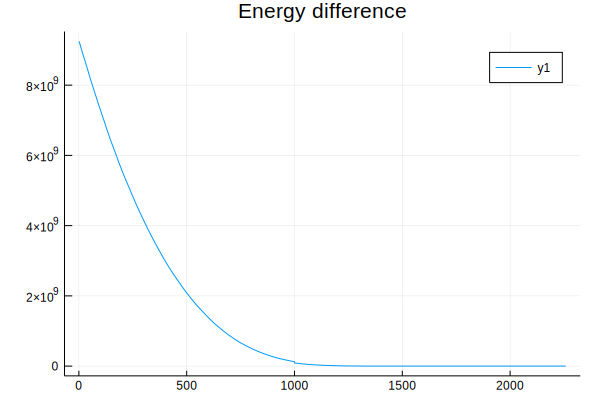

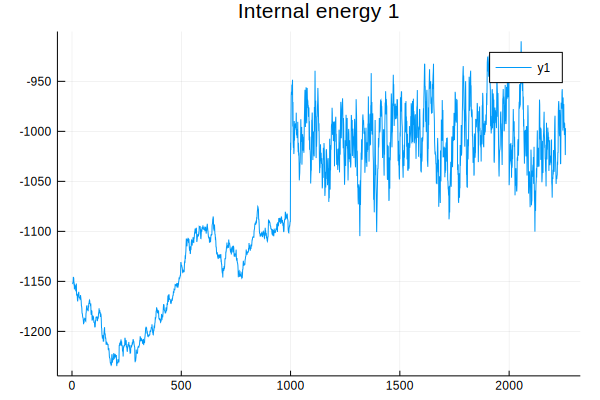

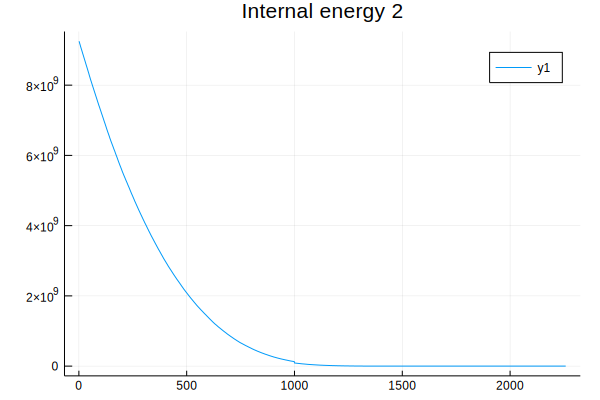

Performing extra MCS
Calculating energies and acceptance rates


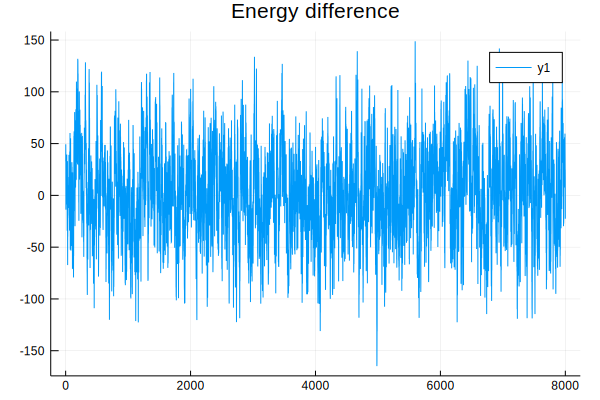

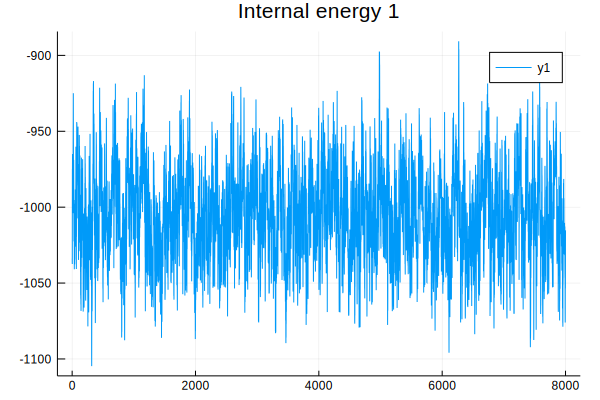

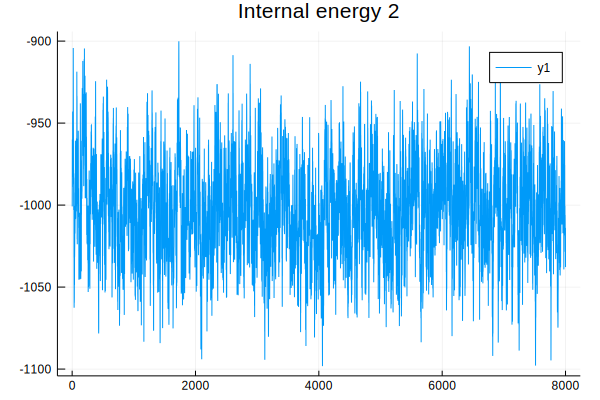

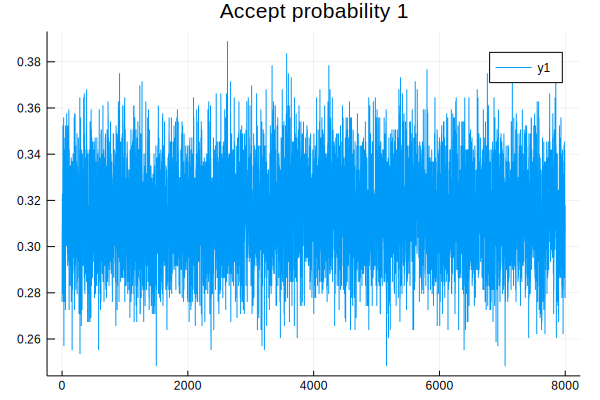

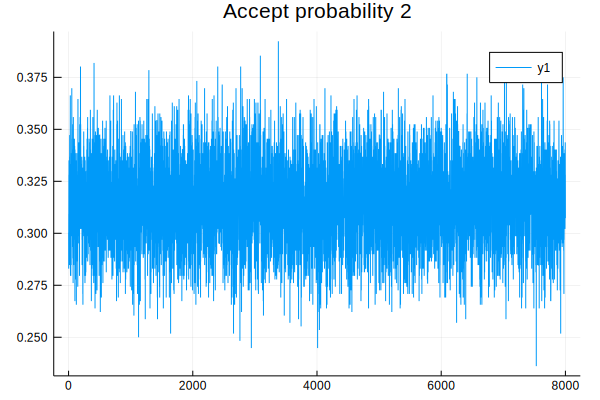

In [11]:
(ψ₁, sim₁, ψ₂, sim₂) = initializeTwoStates(syst, sim);

In [12]:
M = 1000
Δt = 100
ψ = copy(ψ₁)
sim = copy(sim₁)

Controls(1.0471975511965976, 0.4, 0.2633744855967078)

In [13]:
# Construct k-matrix where the horizontal axis contains kx ∈ [-π, π), while
# the vertical axis contain ky ∈ [-π, π) at the second component
k_matrix = [[2π/L*(x-1-L/2), 2π/L*(L/2-y)] for y=1:L, x=1:L]

# Calculate thermal average
(avV⁺, errV⁺, V⁺, avV⁻, errV⁻, V⁻, avS⁺, errS⁺, S⁺, avS⁻, errS⁻, S⁻) = structureFunctionVortexLatticeAvg!(k_matrix, ψ, sim, M, Δt);


Making measurements over a 24×24 matrix of ks.


In [19]:
plt = heatmap(-π:2π/L:π*(L-2)/L, -π:2π/L:π*(L-2)/L, avS⁺, title="average S+", xlabel="k_x", ylabel="k_y")
savefig(plt, "avg_S+_plot.pdf")

In [20]:
plt = heatmap(-π:2π/L:π*(L-2)/L, -π:2π/L:π*(L-2)/L, avS⁻, title="average S-", xlabel="k_x", ylabel="k_y")
savefig(plt, "avg_S-_plot.pdf")

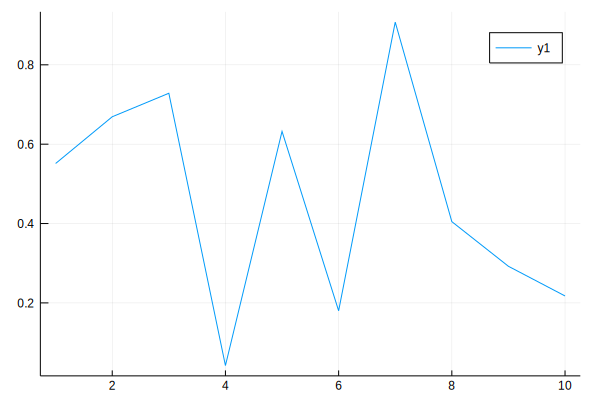

In [30]:
N = 10
plt = plot(1:N, rand(N))
display(plt)

In [ ]:
# Plotting result of structureFunctionVortexLatticeAvg! and saving it to .pdf files in current directory.
function plotAndSaveStructureFunctionAndVortexLattice{T<:Real}(avV⁺::Array{T, 2}, avV⁻::Array{T, 2}, 
        V⁺::Array{T, 2}, V⁻::Array{T,2}, avS⁺::Array{T, 2}, avS⁻::Array{T,2})
    L = size(avV⁺,1)
    # Plotting structure factor
    k_int = -π:2π/L:π*(L-1)/L
    plt = heatmap(k_int, k_int, avS⁺, title="average S+", xlabel="k_x", ylabel="k_y")
    savefig(plt, "avgS+_plot.pdf")
    plt = heatmap(k_int, k_int, avS⁻, title="average S-", xlabel="k_x", ylabel="k_y")
    savefig(plt, "avgS-_plot.pdf")
    
    # Removing middle-point
    println("S⁺(0) ≈ $(avS⁺[Int(ceil(L/2)), Int(ceil(1+L/2))])")
    temp⁺ = avS⁺[Int(ceil(L/2)), Int(ceil(1+L/2))]
    avS⁺[Int(ceil(L/2)), Int(ceil(1+L/2))] = avS⁺[Int(ceil(1+L/2)), Int(ceil(L/2))]
    println("S⁻(0) ≈ $(avS⁻[Int(ceil(L/2)), Int(ceil(1+L/2))])")
    temp⁻ = avS⁻[Int(ceil(L/2)), Int(ceil(1+L/2))]
    avS⁻[Int(ceil(L/2)), Int(ceil(1+L/2))] = avS⁻[Int(ceil(1+L/2)), Int(ceil(L/2))]
    
    # And then re-plotting
    plt = heatmap(k_int, k_int, avS⁺, 
        title="average S+ with S(0) removed", xlabel="k_x", ylabel="k_y")
    savefig(plt, "avgS+_removed_plot.pdf")
    plt = heatmap(k_int, k_int, avS⁻, 
        title="average S- with S(0) removed", xlabel="k_x", ylabel="k_y")
    savefig(plt, "avgS-_removed_plot.pdf")
    
    # Restoring middle point
    avS⁺[Int(ceil(L/2)), Int(ceil(1+L/2))] = temp⁺
    avS⁻[Int(ceil(L/2)), Int(ceil(1+L/2))] = temp⁻
    
    # Plotting vortex snapshots
    plt = heatmap(1:L, 1:L, V⁺, title="Snapshot of + component vorticity", xlabel="x", ylabel="y")
    savefig(plt, "V+_snapshot_plot.pdf")
    plt = heatmap(1:L, 1:L, V⁻, title="Snapshot of - component vorticity", xlabel="x", ylabel="y")
    savefig(plt, "V-_snapshot_plot.pdf")
    
    # Combining matrices
    combined_lattice = combineVortexLattices(V⁺, V⁻)
    plt = heatmap(1:L, 1:L, combined_lattice, title="Combination of snapshots", xlabel="x", ylabel="y")
    savefig(plt)
    
    # Finding the proportion of the different kinds of vortices in combined matrix
    av_vortex_kinds = zeros(9)
    for v_pos = 1:L, h_pos = 1:L
        av_vortex_kinds[combined_lattice[v_pos, h_pos]+1] += 1
    end
    av_vortex_kinds *= 100/L^2
    println("The proportion of vortices (n⁺, n⁻) in snapshot")
    println("% of vortex kind (-1, -1): \t$(Int(round(av_vortex_kinds[1],0)))")
    println("% of vortex kind (-1, 0): \t$(Int(round(av_vortex_kinds[2],0)))")
    println("% of vortex kind (-1, 1): \t$(Int(round(av_vortex_kinds[3],0)))")
    println("% of vortex kind (0, -1): \t$(Int(round(av_vortex_kinds[4],0)))")
    println("% of vortex kind (0, 0): \t$(Int(round(av_vortex_kinds[5],0)))")
    println("% of vortex kind (0, 1): \t$(Int(round(av_vortex_kinds[6],0)))")
    println("% of vortex kind (1, -1): \t$(Int(round(av_vortex_kinds[7],0)))")
    println("% of vortex kind (1, 0): \t$(Int(round(av_vortex_kinds[8],0)))")
    println("% of vortex kind (1, 1): \t$(Int(round(av_vortex_kinds[9],0)))\n")
    
    # Calculating the sum of vortices of snapshot
    sum⁺ = 0.0
    sum⁻ = 0.0
    for h_pos = 1:L, v_pos = 1:L
        sum⁺ += V⁺[v_pos, h_pos]
        sum⁻ += V⁻[v_pos, h_pos]
    end
    println("Sum of + component vorticity in the snapshot: $(sum⁺)")
    println("Sum of - component vorticity in the snapshot: $(sum⁻)")
    flush(STDOUT)
    
    # Plotting vortex averages
    plt = heatmap(1:L, 1:L, avV⁺, title="Average + component vorticity", xlabel="x", ylabel="y")
    savefig(plt)
    plt = heatmap(1:L, 1:L, avV⁻, title="Average - component vorticity", xlabel="x", ylabel="y")
    savefig(plt)
end 
